In [3]:
import numpy as np
import matplotlib.pyplot as plt


<span style="font-family:chalkduster,fantasy;fontsize:90%;color:crimson">
<h1>Randomness and Probabilities</h1>


<span style="font-family:Trebuchet MS,sans-serif;fontsize:90%">

<h2 style="font-family:chalkduster; color:darkviolet">Introducing the functions</h2>
    
Numpy has a submodule called `random` that allows us to deal with probabilities and randomeness. There are several functions within this submodule that will be useful to us.
    
|Function|What it does|
|:---:|:---:|
|`np.random.rand(nrow,ncol)`|Generates an array of `nrow` rows and `ncol` columns of random floats between 0 and 1 from a uniform distribution|
|`np.random.randn(nrow,ncol)`|Generates an array of `nrow` rows and `ncol` columns of random floats<br> between 0 and 1 from a normal distribution|
|`np.random.randint(min,max,(nrow,ncol))`|Generates an array of `nrow` rows and `ncol` columns of random integers between `min` (inclusive) and `max` (exclusive) from a uniform distribution|
|`np.random.choice(arr,p=p_arr,size=(nrow,ncol),replace=True)`|Generates an array of `nrow` rows and `ncol` columns from the given `arr`|
|`np.random.permutation(arr)`|Returns a permuted array of `arr`|
    
To make things simpler, if you prefer, you can import
    
`import numpy.random as r`

I won't do that however -- I have no idea why, but I just prefer typing out `numpy.random`. And I know it's not sensible. I just prefer it that way.

<span style="font-family:Trebuchet MS,sans-serif;fontsize:90%">

<h3 style="font-family:chalkduster; color:tan">In-Class Example #1a: Creating random arrays I.</h3>
    
Create a one dimensional random array of length `N` from the uniform distribution and assign it the name `x_Uni`. Do the same from the normal distribution and assign it the name `x_Norm`. 
    
Then, use the given code to plot a scatter plot of the two arrays to comprehend the difference between them!

In [3]:
N=10000
x_Uni=np.random.rand(N)
x_Norm=np.random.randn(N)

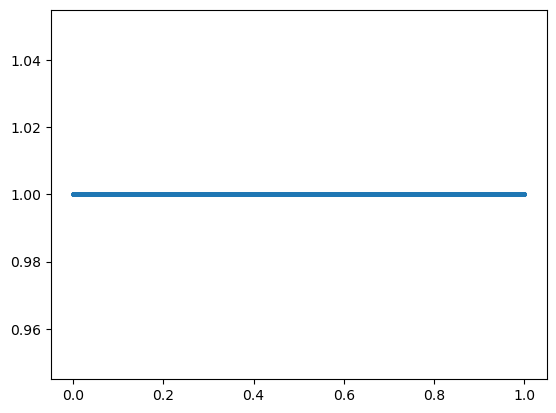

In [4]:
y=np.ones(N)
plt.scatter(x_Uni,y,s=5);

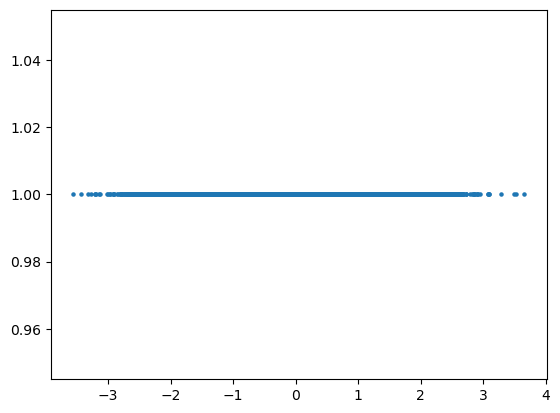

In [5]:
plt.scatter(x_Norm,y,s=5);

<span style="font-family:Trebuchet MS,sans-serif;fontsize:90%">
    
Note that although most of the functions create random numbers between $0$ and $1$, we can add a little modification to create a random number $x$ in the range $a<x<b$ by doing the following:
- Multiplying by the width of the range $(a-b)$
- Shifting the starting point to $a$ by adding $a$ to it. 

<span style="font-family:Trebuchet MS,sans-serif;fontsize:90%">
    
<h3 style="font-family:chalkduster; color:tan">In-Class Example #1b: Creating random arrays II.</h3>
    
Create a random float $a$ in the range of $-5\leq a\leq 5$.<br>
Create a random integer $b$ in the range of $-5\leq b\leq 5$<br>


In [3]:
np.random.rand()*10-5

-4.875360887897236

In [4]:
np.random.randint(-5,5)

-2

<span style="font-family:Trebuchet MS,sans-serif;fontsize:90%">
    
<h3 style="font-family:chalkduster; color:tan">In-Class Example #1c: Creating random arrays III.</h3>
    
Create a random **odd** integer $c$ in the range of $-5\leq c\leq 5$ with uniform probability.
    
- Use `np.random.choice`.
- You first have to create a list of odd integers from which the function will choose from.

In [5]:
Oddint=np.arange(-5,6,2)
np.random.choice(Oddint)

5

<span style="font-family:Trebuchet MS,sans-serif;fontsize:90%">
    
<h3 style="font-family:chalkduster; color:tan">In-Class Example #1d: Creating random arrays IV.</h3>
    
Create a random array `d` of positive integers (inclusive of, but not beyond 20) of dimensions `(3,3)`. These integers should be chosen with uniform probability. You are allowed to have repeated numbers in this array.
    
- Use `np.random.choice`
- You first have to create a list of integers from which the function will choose from.
- You will have to specify the size of the output array.

In [9]:
numbers=np.linspace(1,20,20)
np.random.choice(numbers, (3,3))


array([[ 7.,  8.,  3.],
       [ 8., 19., 10.],
       [16., 13.,  7.]])

<span style="font-family:Trebuchet MS,sans-serif;fontsize:90%">
    
<h3 style="font-family:chalkduster; color:tan">In-Class Example #1e: Creating random arrays V.</h3>
    
Create a random array `e` of positive integers (inclusive of, but not beyond 20) of dimensions `(3,3)`. These integers should be chosen with uniform probability. You are now NOT allowed to have repeated numbers in this array.
    
- Use `np.random.choice`
- You first have to create a list of integers from which the function will choose from.
- You will have to specify the size of the output array.
- You will have to set the optional parameter `replace` to `False`.

In [12]:
OriList=np.linspace(1,20,20)

np.random.choice(OriList,(3,3), replace=False)

array([[ 2.,  1.,  5.],
       [11., 10.,  3.],
       [17.,  4., 16.]])

    
<span style="font-family:Trebuchet MS,sans-serif;fontsize:90%">

<h2 style="font-family:chalkduster; color:darkviolet">Monte Carlo Method: Simple examples</h2>
    
In this section, we will use the Monte Carlo Method on problems of increasing difficulty. Often times it's hard to appreciate the utility of the method when applying the Monte Carto Method to problems that are very simple. 

<span style="font-family:Trebuchet MS,sans-serif;fontsize:90%">

<h3 style="font-family:chalkduster; color:steelblue">Example I: Card Game:</h3>
    
Here we consider two regular deck of 52 cards: Ace to King with four suits. A single-player game is played with this deck according to the following rules:
    
- A card is dealt from each deck in each round of play (i.e. the player gets two cards).
- If the player get a consecutive numbers with the same suit, the player win.
    
Let us first attempt to do a Monte Carlo Simulation of this problem. To simulate this, we need to:
    
1. First define the sample space 
    - How do we model the 52 cards? Note that there are many ways to do this!
    - There's no reason to model both decks. One deck is sufficient.
    - The only reason I'm giving you two decks is so that you don't have to worry about removing the first card from the deck for the second draw (i.e you can leave the `replace=True` in the `np.random.choice` function)
2. Next, define a function that deals out 2 cards randomly.
3. Define a function that checks if the hand wins or loses
4. Define a function that runs the previous two functions many times and collates the results.
    - If we denote the losing result as 0 and winning result as 1, the average of the results will give you the probability of winning in a random run!
    
It seems rather silly to define functions doing such short steps, but for beginner programmers, this is useful! It helps you breakdown a problem and work on individual steps!
    
Some of you might be thinking: Goodness, this is so troublesome! We might as well just calculate the probabilities! It's much more straightforward! And... I would agree with you! Recall that in my slides I pointed out that with problems that are too simple, students do not see the utility of Monte Carlo. The point is to get you to see how you can apply this method to a simple problem (although it's much more efficient to solve the simple problem directly without applying this method!). Once you get how the method works, we can move on to more complicated problems that are too difficult to solve directly!
    
Before we start, I would like you to take some time to think about how YOU would define the sample space -- how would YOU choose to model the 52 cards <b><i>to solve <u>this</u> problem</i></b>? Feel free to discuss this with your friends!

<span style="font-family:Trebuchet MS,sans-serif;fontsize:90%">
    
<h3 style="font-family:chalkduster; color:tan">In-Class Example #2a: Defining the sample space.</h3>
    
I would prefer to model the sample space of the 52 cards by separating the 13 numbers and the 4 suits. That is, I am going to build two 1D arrays:
    
- The first is a 1D array of 13 numbers, with 1 representing ace, 11 Jack, 12 Queen and 13 King
- The second is a 1D Array [1, 2, 3, 4], which represent Spades, Hearts, Clubs and Diamonds accordingly.
    
In this manner the dealing of the card requires us to combine one from each array.
    
Go ahead and create the two arrays called `Value` and `Suit` that will define your sample space.

In [6]:
Value=np.linspace(1,13,13)
Suit=np.linspace(1,4,4)

<span style="font-family:Trebuchet MS,sans-serif;fontsize:90%">
    
<h3 style="font-family:chalkduster; color:tan">In-Class Example #2b: Initialization - Randomly dealing out 2 cards.</h3>
    
Here we define a function called `RandHand()` that does not take in any argument, and deals out 2 cards randomly.
    
Recall that the dealing of one card requires us to combine one random Value and one random Suit. The way I recommend we do this is:
    
- The output of this function should be a 2 by 2 array. 
- For me, each row will represent a card.
- The first column will represent the value of the card, and the second column will represent the suit.
    
Steps:
- Start with defining a 2 by 2 array of zeros
- For the first row:
    - Use `np.random.choice` to initialize the first column to a random Value.
    - Use `np.random.choice` to initialize the second column to a random Suit.
- Either repeat for the second row, or make that into a `for` loop.
- Encapsulate in a function definition.
- Test the function. Expected output is something like:
    
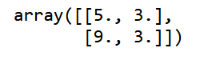    

In [7]:
def RandHand():
    out=np.zeros((2,2))
    for i in range(2):
        out[i,0]=np.random.choice(Value)
        out[i,1]=np.random.choice(Suit)
    return out

In [8]:
print(RandHand())

[[9. 1.]
 [7. 3.]]


<span style="font-family:Trebuchet MS,sans-serif;fontsize:90%">
    
<h3 style="font-family:chalkduster; color:tan">In-Class Example #2c: Winning function.</h3>
    
This is the core function to code. The previous codes were us just setting up the variables and initializing the system. The later portions is just us doing multiple repetitions to take an average. This function however, is the actual function that <b><i>does</i></b> something -- and it is this portion that will be significantly different from problem to problem. Therefore, it is often times the harderst function to code.
    
This function, called `Win()` should take in the 2 by 2 array from the `Rand_Hand()` function and output either a 0 or 1 depending on whether the array satisfies the winning condition.
    
In order to code this function, we first determine what do we have to check for? We have to check if 
- The suits are the same
- The values are consecutive -- i.e., is the difference between them 1.
    
Now, google "how to check if a numpy array has the same value".
    
And, google "how to find the difference between elements in the array".
    
Lastly, think of the logic flow: How would you test this with the `and` and/or `or` operators.

In [40]:
def Win(Hand):
    if Hand[0,1]==Hand[1,1] and np.diff(Hand[:, 0])==1:
        return 1
    else:
        return 0

In [41]:
Hand=RandHand()
print(Hand)
print(Win(Hand))

[[3. 3.]
 [5. 1.]]
0


In [42]:
testarr=np.linspace(1,10,10)
print(testarr)
print(np.diff(testarr))

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[1. 1. 1. 1. 1. 1. 1. 1. 1.]


<span style="font-family:Trebuchet MS,sans-serif;fontsize:90%">
    
<h3 style="font-family:chalkduster; color:tan">In-Class Example #2d: Monte Carlo Simulation!.</h3>
    
Here we write a function called `MonteCarlo`, that takes in a positive integer `N` and just runs the last two functions `N` times and returns a collated array of 0s and 1s depending on the outcome. The average value of this array (if done sufficient times) should return the probability that one would win this game in one run!
    
This function should take in the integer `N` and output a float.
    
Hint: Recall that for Numpy, it is often more sensible to define an output array first and fill it up later.

Hint II: This function is basically a `for` loop that runs the previous two functions `N` times.

In [43]:
def MonteCarlo(N):
    out=np.zeros(N)
    for i in range(N):
        out[i]=Win(RandHand())
    return np.mean(out)

In [44]:
MonteCarlo(10000)

0.019

<span style="font-family:Trebuchet MS,sans-serif;fontsize:90%">
    
<h3 style="font-family:chalkduster; color:tan">In-Class Example #2e: Calculating the probability!</h3>
    
Here we calculate the probability algebraically to check our answer! Discuss how one can obtain this probability!

In [45]:
1/4*2/13

0.038461538461538464